In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [21]:
nd = 8

In [22]:
a = [] 
for l in open("test.txt","r").readlines()[1::2]: 
    a.append([float(x) for x in l.split(",")[:-1]])
arr = np.array(a); print(arr.shape)

(25, 16)


In [4]:
b = [] 
for l in open("test.txt","r").readlines()[0::2]: 
    b.append([float(x) for x in l.split(",")[:-1]])
arr2 = np.array(b); print(arr2.shape)

(11840, 18)


In [23]:
arr[0]

array([-0.0531029 , -0.0404975 , -0.00594276, -0.04075   , -0.052687  ,
        0.00649628, -0.00545959,  0.00595738,  0.0413381 , -0.0409806 ,
        0.0409314 ,  0.00627312, -0.00540553,  0.0520061 ,  0.0404678 ,
        0.0523709 ])

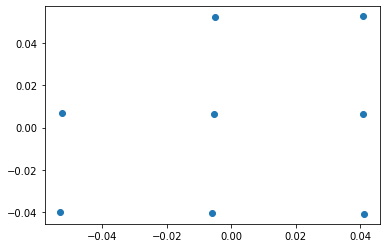

In [24]:
xi = arr[1][-2*nd::2]; yi = arr[1][-2*nd+1::2];
plt.scatter(xi,yi)

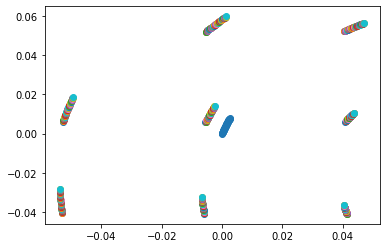

In [75]:
for i in range(0,len(arr)):
    xi = arr[i][-2*nd::2]; yi = arr[i][-2*nd+1::2];
    plt.scatter(xi,yi)
#plt.scatter(*np.mean([arr[:,::2],arr[:,1::2]],axis=2))
#plt.scatter(arr1[:,0],arr1[:,1])
plt.scatter(df["comx"],df["comy"])

In [76]:
a = [] 
for l in open("test.txt","r").readlines()[1::2]: 
    a.append([float(x) for x in l.split(",")[:]])
arr1 = np.array(a); print(arr1.shape)

ValueError: could not convert string to float: ''

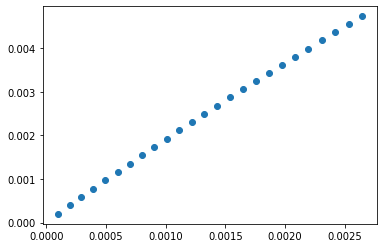

In [53]:
plt.scatter(arr1[:,0],arr1[:,1])

In [51]:
indexer = arr[:,-2*nd+1] > 0.0241
plt.scatter(arr[:,0][indexer],arr[:,2*nd+1][indexer])  # only upper part close to max

IndexError: index 17 is out of bounds for axis 1 with size 16

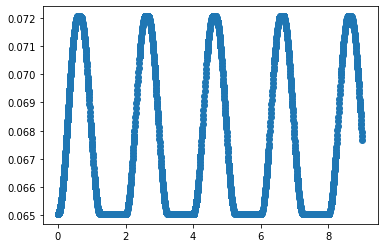

In [490]:
plt.scatter(arr[:,0],arr2[:,1])  # l0 (actuation function)

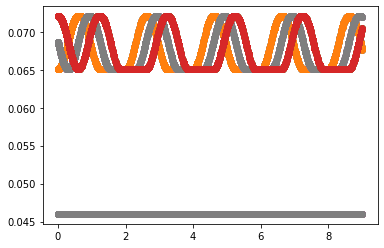

In [491]:
[plt.scatter(arr[:,0],arr2[:,i]) for i in range(len(arr2[0]))]

In [493]:
max(arr[:,0])

9.00249

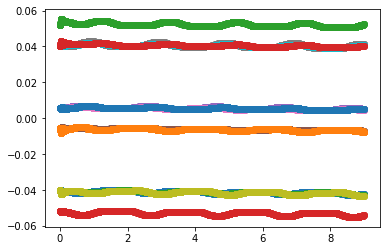

In [528]:
[plt.scatter(arr[:,0],arr[:,i]) for i in range(2*nd+2,4*nd)]

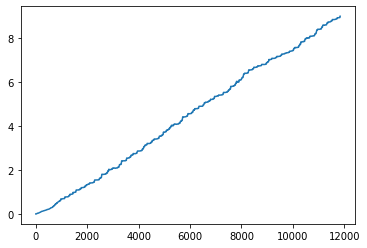

In [529]:
plt.plot(arr[:,0])

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colorbar import ColorbarBase
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [116]:
a = [] 
for l in open("test.txt","r").readlines()[::2]: 
    a.append([float(x) for x in l.split(",")[:-1]])
arr = np.array(a); print(arr.shape)
a = [] 
for l in open("test.txt","r").readlines()[1::2]: 
    a.append([float(x) for x in l.split(",")[:]])
arr2 = np.array(a); print(arr2.shape)

(50, 17)
(50, 3)


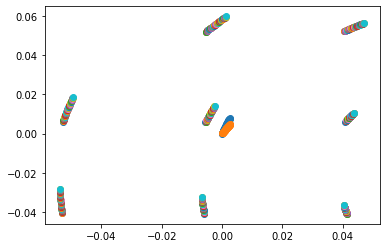

In [117]:
for i in range(0,len(arr)):
    xi = arr[i][-2*nd::2]; yi = arr[i][-2*nd+1::2];
    plt.scatter(xi,yi)
plt.scatter(np.mean(arr[:,1::2],axis=1),np.mean(arr[:,2::2],axis=1))
plt.scatter(arr2[:,0],arr2[:,1])

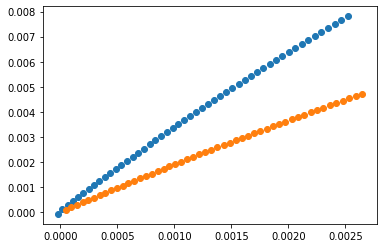

In [118]:
plt.scatter(np.mean(arr[:,1::2],axis=1),np.mean(arr[:,2::2],axis=1))
plt.scatter(arr2[:,0],arr2[:,1])

In [80]:
def phase_heatmap(df, colname, ax, title, size=110, minv=None, maxv=None, phase1="phase 0", phase2="phase 1"):
    if minv == None and maxv == None: 
        minv = df[colname].min(); maxv = df[colname].max()
    ax.set(xlim=(0,2),ylim=(0,2),title=title); ax.set_aspect(1)
    ax.scatter(df[phase1], df[phase2], cmap=mpl.colormaps["plasma"],marker="s",
        c=mpl.colors.Normalize(minv,maxv)(df[colname]),s=size)
    divider = make_axes_locatable(ax); cax = divider.append_axes("right", size="5%", pad=0.05)
    ColorbarBase(cax,cmap=mpl.colormaps["plasma"],norm=mpl.colors.Normalize(minv,maxv))

KeyError: "None of [Index(['d_comx', 'd_comy'], dtype='object')] are in the [columns]"

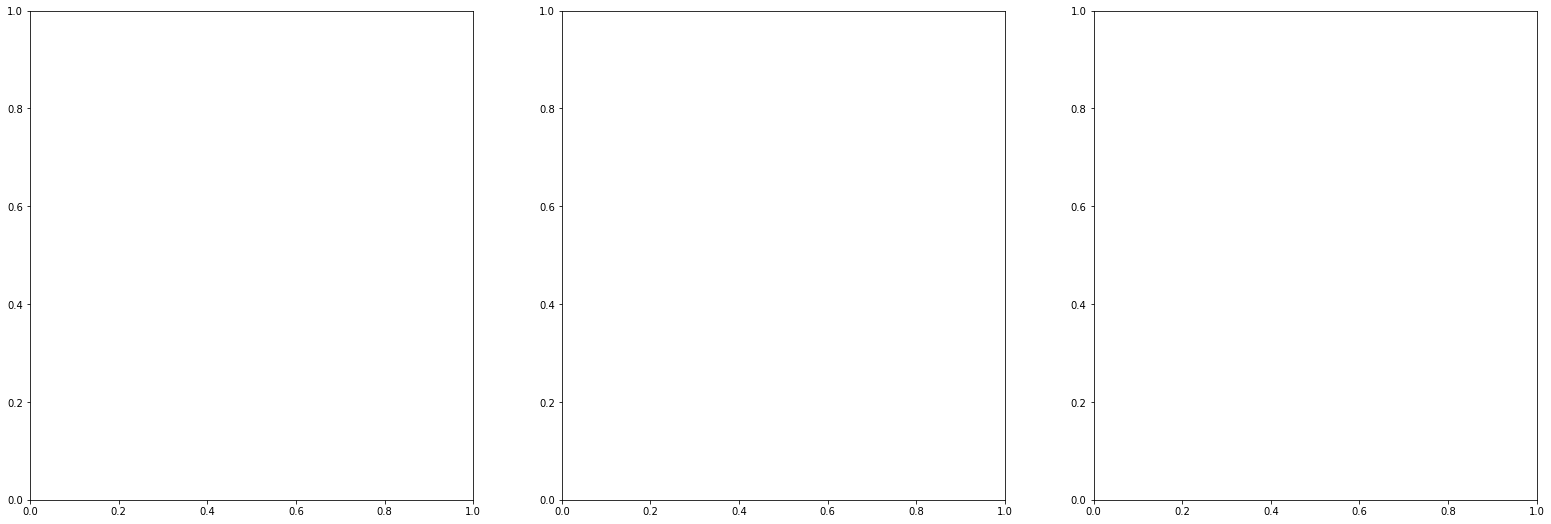

In [81]:
fig, ax = plt.subplots(1,3,figsize=(27,9)); coms = df[["d_comx","d_comy"]].to_numpy()
mi = coms.min(); ma = coms.max()
phase_heatmap(df,"d_comx",ax[0],"CoM x-displacement",size=300,minv=mi,maxv=ma)
phase_heatmap(df,"d_comy",ax[1],"CoM y-displacement",size=300,minv=mi,maxv=ma)
phase_heatmap(df,"d_theta",ax[2],"angular drift",size=300)

In [55]:
def rot(v,theta):
    c, s = np.cos(theta), np.sin(theta); R = np.array(((c, -s), (s, c))); return np.dot(R,v)

In [105]:
sol_col = np.array([[f"x{i}", f"y{i}"] for i in range(nd)]).flatten().tolist()
df = pd.DataFrame(arr,columns=["t"] + sol_col)
df = df.assign(comx=df[sol_col[::2]].mean(axis=1),comy=df[sol_col[1::2]].mean(axis=1))
df = df.assign(vx=[0] + [(df.comx[i]-df.comx[i-1])/(df.t[i]-df.t[i-1]) for i in range(1,len(df.comx))])
shifted = np.array([x.to_numpy()-df[["comx","comy"]].to_numpy() for x in np.split(df[sol_col],nd,axis=1)])
df = df.assign(angle=(-np.mean([np.unwrap([np.arctan2(*r)-np.arctan2(*v[0]) for r in v]) 
                            for v in shifted],axis=0))) # no mod 2 pi here because small change, also everything in radiants 

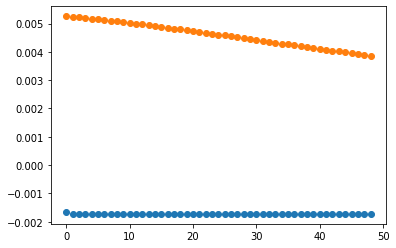

In [121]:
plt.scatter(np.arange(len(df)-1),np.diff(df["angle"]))
plt.scatter(np.arange(len(arr2)-1),np.diff(arr2[:,2]))